In [1]:
import graphviz

### Instantiate a graph

In [3]:
# g = graphviz.Graph(format='png')  
dot = graphviz.Digraph('round-table', comment='The Round Table')

### add some nodes

In [4]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

### add some edges

In [5]:
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

### show the source code created

In [6]:
print(dot.source)

// The Round Table
digraph "round-table" {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


### render the graph

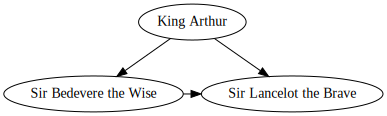

In [7]:
dot

### create actual image file

In [8]:
dot.render(directory='doctest-output', view=True)  
'doctest-output/round-table.gv.pdf'

'doctest-output/round-table.gv.pdf'

### more complex code

digraph "pet-shop" {
	graph [rankdir=RL]
	node [shape=plaintext]
	edge [arrowhead=vee arrowsize=2]
	parrot
	dead
	parrot -> dead
}


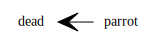

In [11]:
ps = graphviz.Digraph('pet-shop', node_attr={'shape': 'plaintext'})
ps.node('parrot')
ps.node('dead')
ps.edge('parrot', 'dead')
ps.graph_attr['rankdir'] = 'RL'  
ps.edge_attr.update(arrowhead='vee', arrowsize='2')
print(ps.source)
ps

### more complex attribute settings

graph ni {
	node [shape=rarrow]
	1 [label="Ni!"]
	2 [label="Ni!"]
	3 [label="Ni!" color=coral shape=egg style=filled]
	node [shape=star]
	4 [label="Ni!"]
	5 [label="Ni!"]
	rankdir=LR
	1 -- 2
	2 -- 3
	3 -- 4
	4 -- 5
}


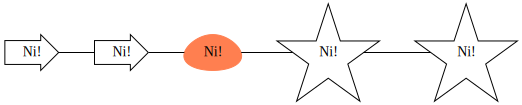

In [12]:
ni = graphviz.Graph('ni')  
ni.attr('node', shape='rarrow')
ni.node('1', 'Ni!')
ni.node('2', 'Ni!')
ni.node('3', 'Ni!', shape='egg', color='coral', style='filled')
ni.attr('node', shape='star')
ni.node('4', 'Ni!')
ni.node('5', 'Ni!')
ni.attr(rankdir='LR')  
ni.edges(['12', '23', '34', '45'])
print(ni.source)  
# ni.render(directory='doctest-output', view=True).replace('\\', '/')
# 'doctest-output/ni.gv.png'
ni

### Subgraph

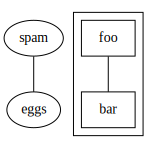

In [13]:
p = graphviz.Graph(name='parent', engine='dot')
p.edge('spam', 'eggs')
c = graphviz.Graph(name='cluster_child', node_attr={'shape': 'box'})
c.edge('foo', 'bar')
p.subgraph(c)
p

### using simple function to generate graph from lists 

In [14]:
def create_graph(nodes: dict, edges: list):
    nodes = nodes
    edges = edges
    
    graph = graphviz.Digraph('node')
    
    node_data = [ graph.node(node['name'],node['label'],shape=node['shape']) for node in nodes] 
    edge_data = [ graph.edge(edge[0],edge[1]) for edge in edges]
    print(graph.source)
    return graph
    

digraph "node" {
	node1 [label=John shape=oval]
	node2 [label=Marie shape=square]
	node3 [label=Fred shape=hexagon]
	node1 -> node2
	node2 -> node3
	node1 -> node3
}


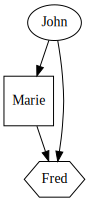

In [15]:
nodes = [{'name':'node1','label': 'John', 'shape': 'oval'},
         {'name':'node2','label': 'Marie', 'shape': 'square'},
         {'name':'node3','label': 'Fred', 'shape': 'hexagon'}
        
        ]
edges = [['node1','node2'],['node2','node3'],['node1','node3']]

create_graph(nodes, edges)
